In [1]:
from salad.directions import SearchDirections
import astropy.units as u
import matplotlib.pyplot as plt
from salad.serialize import Serializable

In [9]:
import numpy as np

class SearchDirections(Serializable):
    def __init__(self, velocity_range, angle_range, dx, dt):
        """
        specify two ranges and units
        """
        self.velocity_range = velocity_range
        self.angle_range = angle_range
        self.dx = dx
        self.dt = dt

    @property
    def v_min(self):
        return min(self.velocity_range)
    
    @property
    def v_max(self):
        return max(self.velocity_range)
        
    @property
    def phi_min(self):
        return min(self.angle_range)
    
    @property
    def phi_max(self):
        return max(self.angle_range)

        
    @property
    def b(self):
        if not hasattr(self, "_b"):
            _min = (-self.v_max * self.dt/self.dx).to(u.dimensionless_unscaled)
            _max = (self.v_max * self.dt/self.dx).to(u.dimensionless_unscaled)
            _v_x = np.arange(_min, _max + 1, 1)
            _v_y = np.arange(_min, _max + 1, 1)
            v_x_m, v_y_m = np.meshgrid(_v_x, _v_y)
            b = (np.vstack([v_x_m.flatten(), v_y_m.flatten()]).T * (self.dx/self.dt)).to(self.v_max.unit)
            _v = ((b**2).sum(axis=1)**0.5)
            _phi = np.arctan2(b[:, 1], b[:, 0])

            v_mask = (_v >= self.v_min) & (_v <= self.v_max)
            phi_mask = (_phi >= self.phi_min) & (_phi <= self.phi_max)
            b_m = b.reshape(len(_v_x), len(_v_y), 2)
            adjacent_dx_width = (b_m - np.roll(np.roll(b_m, 1, axis=0), 1, axis=1))[1:, 1:] * self.dt/self.dx
            assert(np.allclose(adjacent_dx_width[~np.isnan(adjacent_dx_width)], 1)) # all adjacent velocities are within 1 dx over timespan of dt
            self._b = b[v_mask & phi_mask]
        return self._b


In [4]:
([1.4, 4.5] * u.arcsec/u.hour).to(u.deg/u.day)

<Quantity [0.00933333, 0.03      ] deg / d>

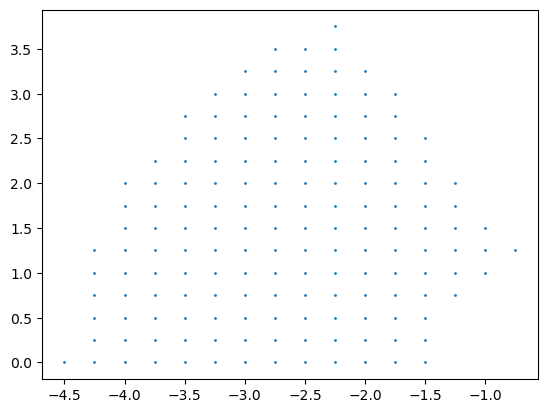

159


In [9]:

# 1.4 arcsec/hr to 4.5 arcsec/h
directions = SearchDirections(
    [1.4, 4.5] * u.arcsec/u.hour,
    [120, 240] * u.deg,
    1 * u.arcsec, 
    4/24 * u.day,
)
b = directions.b
len(b)#, len(phi), len(v)

fig = plt.figure()
plt.scatter(b[:, 0], b[:, 1], s=1)
# plt.xlim(-0.5, 0.5)
# plt.ylim(-0.5, 0.5)
plt.show()
print(len(b))

In [18]:
b.shape

(144, 2)

In [21]:
b

<Quantity [[ 0. , -4.5],
           [-2. , -4. ],
           [-1.5, -4. ],
           [-1. , -4. ],
           [-0.5, -4. ],
           [ 0. , -4. ],
           [ 0.5, -4. ],
           [ 1. , -4. ],
           [ 1.5, -4. ],
           [ 2. , -4. ],
           [-2.5, -3.5],
           [-2. , -3.5],
           [-1.5, -3.5],
           [-1. , -3.5],
           [-0.5, -3.5],
           [ 0. , -3.5],
           [ 0.5, -3.5],
           [ 1. , -3.5],
           [ 1.5, -3.5],
           [ 2. , -3.5],
           [ 2.5, -3.5],
           [-3. , -3. ],
           [-2.5, -3. ],
           [-2. , -3. ],
           [-1.5, -3. ],
           [-1. , -3. ],
           [-0.5, -3. ],
           [ 0. , -3. ],
           [ 0.5, -3. ],
           [ 1. , -3. ],
           [ 1.5, -3. ],
           [ 2. , -3. ],
           [ 2.5, -3. ],
           [ 3. , -3. ],
           [-3.5, -2.5],
           [-3. , -2.5],
           [-2.5, -2.5],
           [-2. , -2.5],
           [-1.5, -2.5],
           [-1. , -2.5],


In [20]:
phi

<Quantity [-3.14159265, -3.08283683, -3.01723766, -2.94419709, -2.86329299,
           -2.77441882, -2.67794504, -2.57486344, -2.46685171, -2.35619449,
           -2.24553727, -2.13752554, -2.03444394, -1.93797016, -1.84909599,
           -1.76819189, -1.69515132, -1.62955215, -1.57079633, -3.20034848,
           -3.14159265, -3.07502449, -2.9996956 , -2.91479381, -2.8198421 ,
           -2.71496516, -2.60117315, -2.48054948, -2.35619449, -2.2318395 ,
           -2.11121583, -1.99742382, -1.89254688, -1.79759517, -1.71269338,
           -1.63736449, -1.57079633, -1.5120405 , -3.26594765, -3.20816082,
           -3.14159265, -3.06482076, -2.97644398, -2.8753406 , -2.76108628,
           -2.63449415, -2.49809154, -2.35619449, -2.21429744, -2.07789483,
           -1.9513027 , -1.83704838, -1.735945  , -1.64756822, -1.57079633,
           -1.50422816, -1.44644133, -3.33898821, -3.28348971, -3.21836454,
           -3.14159265, -3.05093277, -2.94419709, -2.8198421 , -2.67794504,
           -

In [16]:
50*30

1500

In [17]:
260*150

39000

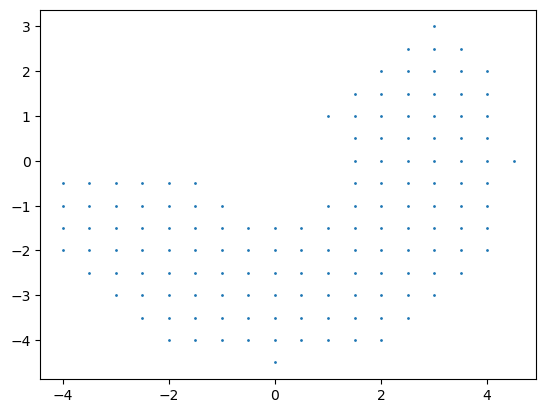

144


In [11]:
50*30

1500

In [6]:
directions = SearchDirections(
    [0.1, 0.5] * u.deg/u.day,
    [0, 90] * u.deg,
    10 * u.arcsec, 
    4/24 * u.day,
)
b, phi, v = directions.b


In [7]:
len(b)

703

In [89]:
240 % 180

60

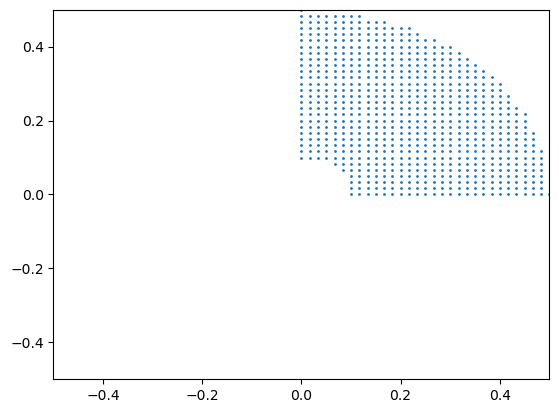

703


In [109]:
directions = SearchDirections(
    [0.1, 0.5] * u.deg/u.day,
    [0, 90] * u.deg,
    10 * u.arcsec, 
    4/24 * u.day,
)
b, phi, v = directions.b

fig = plt.figure()
plt.scatter(b[:, 0], b[:, 1], s=1)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.show()
print(len(b))

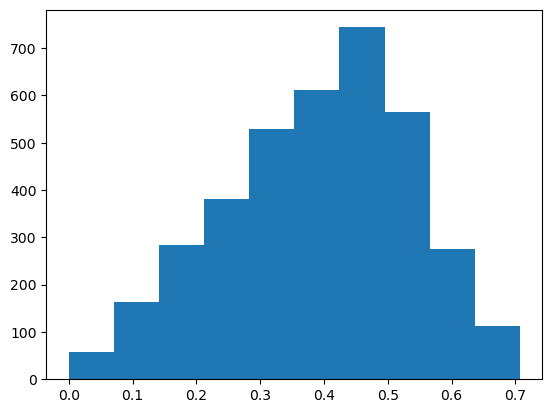

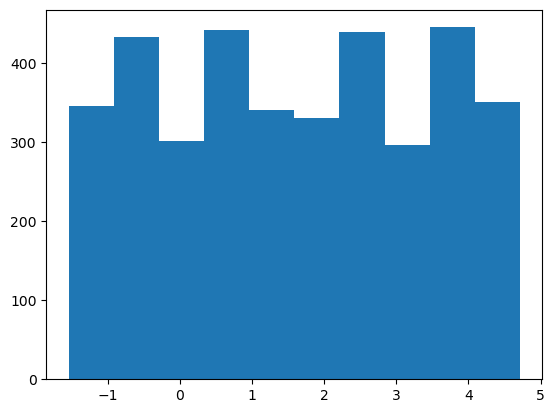

In [87]:
plt.hist(v)
plt.show()
plt.hist(phi)
plt.show()

In [50]:
phi[(phi > (120 *u.deg).to(u.rad)) & (phi < (240 *u.deg).to(u.rad))].to(u.deg)

<Quantity [180.        , 180.        , 180.        , 180.        ,
           180.        , 180.        , 180.        , 180.        ,
           180.        , 180.        , 180.        , 180.        ,
           180.        , 180.        , 180.        , 180.        ,
           180.        , 180.        , 180.        , 180.        ,
           180.        , 180.        , 180.        , 180.        ,
           180.        , 180.        , 180.        , 180.        ,
           180.        , 180.        , 178.09084757, 178.02506599,
           177.95459151, 177.8789036 , 177.79740184, 177.70938996,
           177.61405597, 177.51044708, 177.3974378 , 177.27368901,
           177.13759477, 176.9872125 , 176.82016988, 176.63353934,
           176.42366563, 176.18592517, 175.91438322, 175.60129465,
           175.23635831, 174.80557109, 174.28940686, 173.65980825,
           172.87498365, 171.86989765, 170.53767779, 168.69006753,
           165.96375653, 161.56505118, 153.43494882, 135.     